In [3]:
%load_ext autoreload
%autoreload 2

import os
from pprint import pprint

from math import sqrt
import pickle
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.transforms import Affine2D
from sklearn.metrics import auc 

print(os.getcwd())

/home/matthew/git/cadc_testing/uncertainty_eval


In [4]:
# Confidence interval caluculations
z_score = 1.96 # 95% CI

def get_conf_intervals(stds, sample_amounts):
    conf_intervals = []
    for i in range(len(sample_amounts)):
        conf_intervals.append(z_score * stds[i] / sample_amounts[i])
    return conf_intervals

In [56]:
# MC Dropout



# Sample amounts [TP FP_ML FP]
sample_amounts_clf = [7969, 4378, 39274]

# NLL CLF Means [TP FP_ML FP]
mcdropout_nll_clf_means = [0.2961, 1.3753, 0.1478]
# NLL CLF Vars [TP FP_ML FP]
nll_clf_vars = [0.1547, 5.7901, 0.034]
nll_clf_stds = [np.sqrt(var) for var in nll_clf_vars]
mcdropout_nll_clf_conf_interval = get_conf_intervals(nll_clf_stds, sample_amounts)

# Brier Score Means [TP FP_ML FP]
mcdropout_brier_clf_means = [0.1678, 0.8226, 0.0631]
# Brier Score Vars [TP FP_ML FP]
brier_clf_vars = [0.0879, 0.35, 0.0175]
brier_clf_stds = [np.sqrt(var) for var in brier_clf_vars]
mcdropout_brier_clf_conf_interval = get_conf_intervals(brier_clf_stds, sample_amounts)
    
# NLL REG Means [TP FP_ML FP]
mcdropout_nll_reg_means = [-4.7454, 6.0257]
# NLL REG Vars [TP FP_ML FP]
nll_reg_vars = [80.294, 413.1163]
nll_reg_stds = [np.sqrt(var) for var in nll_reg_vars]
mcdropout_nll_reg_conf_interval = get_conf_intervals(nll_reg_stds, sample_amounts[:2])

# Energy REG Means [TP FP_ML FP]
mcdropout_energy_reg_means = [0.3752, 0.9356]
# Energy REG Vars [TP FP_ML FP]
energy_reg_vars = [0.2866, 0.9222]
energy_reg_stds = [np.sqrt(var) for var in energy_reg_vars]
mcdropout_energy_reg_conf_interval = get_conf_intervals(energy_reg_stds, sample_amounts[:2])

In [57]:
# Ensemble

# Confidence interval caluculations
z_score = 1.96 # 95% CI

# Sample amounts [TP FP_ML FP]
sample_amounts = [8365, 3552, 23540]

# NLL CLF Means [TP FP_ML FP]
ensemble_nll_clf_means = [0.2363, 0.9916, 0.2503]
# NLL CLF Vars [TP FP_ML FP]
nll_clf_vars = [0.1057, 2.5469, 0.0496]
ensemble_nll_clf_stds = [np.sqrt(var) for var in nll_clf_vars]
ensemble_nll_clf_conf_interval = get_conf_intervals(nll_clf_stds, sample_amounts)

# Brier Score Means [TP FP_ML FP]
ensemble_brier_clf_means = [0.132, 0.6858, 0.1166]
# Brier Score Vars [TP FP_ML FP]
brier_clf_vars = [0.0699, 0.2681, 0.032]
brier_clf_stds = [np.sqrt(var) for var in brier_clf_vars]
ensemble_brier_clf_conf_interval = get_conf_intervals(brier_clf_stds, sample_amounts)
    
# NLL REG Means [TP FP_ML FP]
ensemble_nll_reg_means = [-4.8354, 5.5953]
# NLL REG Vars [TP FP_ML FP]
nll_reg_vars = [65.8306, 356.4318]
nll_reg_stds = [np.sqrt(var) for var in nll_reg_vars]
ensemble_nll_reg_conf_interval = get_conf_intervals(nll_reg_stds, sample_amounts[:2])

# Energy REG Means [TP FP_ML FP]
ensemble_energy_reg_means = [0.3594, 0.9471]
# Energy REG Vars [TP FP_ML FP]
energy_reg_vars = [0.2604, 0.9466]
energy_reg_stds = [np.sqrt(var) for var in energy_reg_vars]
ensemble_energy_reg_conf_interval = get_conf_intervals(energy_reg_stds, sample_amounts[:2])


In [58]:
# MIMO-ID (A)


In [59]:
# MIMO-noID (B)


In [60]:
# MIMO-ID (C)


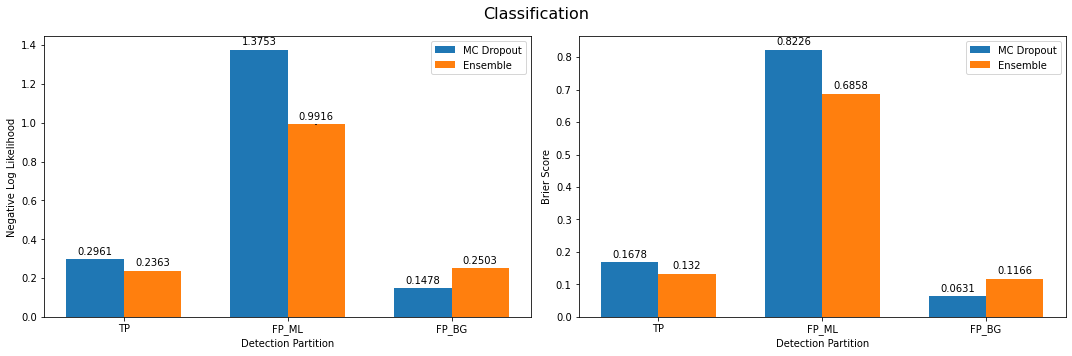

In [61]:
labels = ['TP', 'FP_ML', 'FP_BG']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, axs = plt.subplots(1, 2, figsize=(15,5))
plt.rcParams.update({'font.size': 10})

rects1 = axs[0].bar(x - width/2, mcdropout_nll_clf_means, width, label='MC Dropout', yerr=mcdropout_nll_clf_conf_interval)
rects2 = axs[0].bar(x + width/2, ensemble_nll_clf_means, width, label='Ensemble', yerr=ensemble_nll_clf_conf_interval)

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[0].set_ylabel('Negative Log Likelihood')
axs[0].set_xlabel('Detection Partition')
axs[0].set_title('')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].legend()

axs[0].bar_label(rects1, padding=3)
axs[0].bar_label(rects2, padding=3)

rects1 = axs[1].bar(x - width/2, mcdropout_brier_clf_means, width, label='MC Dropout', yerr=mcdropout_brier_clf_conf_interval)
rects2 = axs[1].bar(x + width/2, ensemble_brier_clf_means, width, label='Ensemble', yerr=ensemble_brier_clf_conf_interval)

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[1].set_ylabel('Brier Score')
axs[1].set_xlabel('Detection Partition')
# axs[1].set_title('TODO')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].legend()

axs[1].bar_label(rects1, padding=3)
axs[1].bar_label(rects2, padding=3)


fig.suptitle('Classification', fontsize=16)
fig.tight_layout()
plt.show()

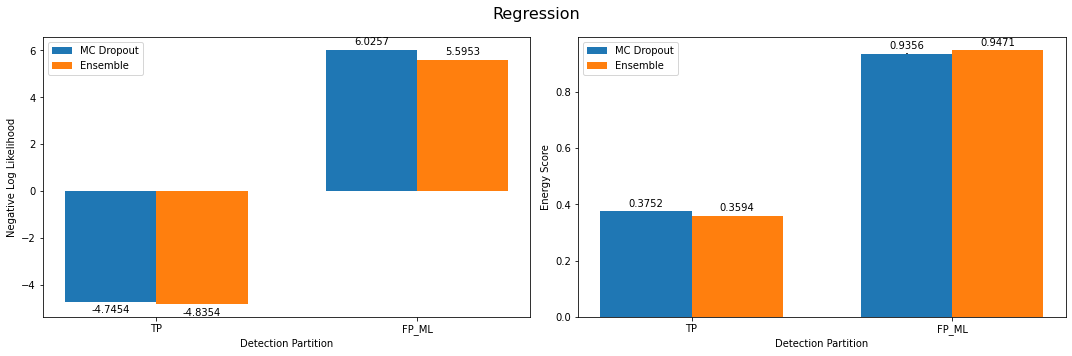

In [62]:
labels = ['TP', 'FP_ML']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, axs = plt.subplots(1, 2, figsize=(15,5))
plt.rcParams.update({'font.size': 10})

rects1 = axs[0].bar(x - width/2, mcdropout_nll_reg_means, width, label='MC Dropout', \
                    yerr=mcdropout_nll_reg_conf_interval)
rects2 = axs[0].bar(x + width/2, ensemble_nll_reg_means, width, label='Ensemble', \
                    yerr=ensemble_nll_reg_conf_interval)

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[0].set_ylabel('Negative Log Likelihood')
axs[0].set_xlabel('Detection Partition')
axs[0].set_title('')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].legend()

axs[0].bar_label(rects1, padding=3)
axs[0].bar_label(rects2, padding=3)

rects1 = axs[1].bar(x - width/2, mcdropout_energy_reg_means, width, label='MC Dropout', \
                    yerr=mcdropout_energy_reg_conf_interval)
rects2 = axs[1].bar(x + width/2, ensemble_energy_reg_means, width, label='Ensemble', \
                    yerr=ensemble_energy_reg_conf_interval)

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[1].set_ylabel('Energy Score')
axs[1].set_xlabel('Detection Partition')
# axs[1].set_title('TODO')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].legend()

axs[1].bar_label(rects1, padding=3)
axs[1].bar_label(rects2, padding=3)


fig.suptitle('Regression', fontsize=16)
fig.tight_layout()
plt.show()

In [157]:
# Uncertainty metrics data
# mcdropout = [0.4687, 0.5743, 0.6873, 0.4544, 0.5622, 0.6749, 0.0143, 0.0121, 0.0125, 0.2272, 0.3167, 0.5053, 0.1312, 0.1642, 0.1946]
# ensemble = [0.6198, 0.7173, 0.7566, 0.613, 0.7081, 0.7463, 0.0068, 0.0092, 0.0103, 0.2341, 0.4334, 0.5329, 0.1112, 0.1482, 0.1797]
# mimo_id = [0.6971, 0.7734, 0.8197, 0.6968, 0.7731, 0.8196, 0.0002, 0.0003, 0.0002, 0.0029, 0.0128, 0.0071, 0.1265, 0.1527, 0.1794]
# mimo_bev = [0.6374, 0.7463, 0.7715, 0.6373, 0.7462, 0.7714, 0, 0.0001, 0.0001, 0.0082, 0.0204, 0.0164, 0.1165, 0.1586, 0.184]
# mimo_bev_wide = [0.5568,0.6755,0.7501,0.5568,0.6753,0.7501,0.0,0.0002,0.0,0.0026,0.0035,0.0058,0.0831,0.1249,0.1782]
# mimo_bev_3hds = [0.6257,0.7311,0.8198,0.6251,0.7303,0.8182,0.0006,0.0008,0.0016,0.0106,0.0286,0.0194,0.103,0.1466,0.21]
# mimo_bev_3hds_wide = [0.6164,0.6801,0.7998,0.6157,0.6795,0.7995,0.0006,0.0006,0.0003,0.0028,0.0269,0.0096,0.0858,0.1176,0.1717]
# mimo_bev_diff_params = [0.6326,0.7058,0.8156,0.6325,0.7058,0.8156,0.0,0.0,0.0,0.0006,0.0067,0.0079,0.0877,0.1348,0.1793]
# mimo_bev_diff_params2 = [0.5635,0.6704,0.7754,0.563,0.6698,0.7748,0.0004,0.0006,0.0007,0.0018,0.0146,0.0374,0.094,0.1366,0.1839]
# mimo_bev_diff_params3 = [0.5856,0.6784,0.7022,0.5845,0.6757,0.7006,0.0011,0.0028,0.0016,0.008,0.0371,0.0774,0.1003,0.1493,0.2374]

mcdropout = [0.7833,0.8276,0.7065,0.7779,0.8196,0.7003,0.0054,0.008,0.0061,0.2272,0.3167,0.7709,0.1312,0.1642,0.2142]
ensemble = [0.7918,0.8781,0.6922,0.7887,0.8711,0.6785,0.0031,0.007,0.0138,0.1466,0.5096,0.5503,0.0917,0.1284,0.2235]
mimo_id = [0.786,0.8478,0.4907,0.7859,0.8473,0.4875,0.0002,0.0004,0.0032,0.0003,0.0076,0.0467,0.1059,0.136,0.2692]
mimo_bev = [0.8041,0.8417,0.6304,0.8041,0.8416,0.6303,0.0,0.0001,0.0001,0.0058,0.022,0.0051,0.0954,0.1419,0.1974]

# Current
ensemble_0 = [0.8227, 0.8504, 0.699, 0.8227, 0.8504, 0.699, 0, 0, 0, 0, 0, 0, 0.0924, 0.1235, 0.1717]
ensemble_1 = [0.8135, 0.8279, 0.7715, 0.8135, 0.8279, 0.7715, 0, 0, 0, 0, 0, 0, 0.0878, 0.1218, 0.1519]
ensemble_2 = [0.8252, 0.8164, 0.821, 0.8252, 0.8164, 0.821, 0, 0, 0, 0, 0, 0, 0.0877, 0.1209, 0.1415]
ensemble_3 = [0.8069, 0.8382, 0.8046, 0.8069, 0.8382, 0.8046, 0, 0, 0, 0, 0, 0, 0.088, 0.1288, 0.1634]
ensemble = [0.8023, 0.8573, 0.7928, 0.7992, 0.8483, 0.7784, 0.0031, 0.0089, 0.0144, 0.1466, 0.5113, 0.3803, 0.0917, 0.1309, 0.1739]
mcdropout = [0.7964, 0.8375, 0.8266, 0.7909, 0.8298, 0.8202, 0.0055, 0.0078, 0.0064, 0.2272, 0.3169, 0.4877, 0.1312, 0.1641, 0.1862]
mimo_id = [0.8013, 0.8558, 0.8243, 0.8011, 0.8553, 0.824, 0.0002, 0.0004, 0.0003, 0.0003, 0.0076, 0.01, 0.1059, 0.1355, 0.1366]
mimo_bev = [0.818, 0.8497, 0.8036, 0.818, 0.8496, 0.8035, 0, 0.0001, 0.0001, 0.0058, 0.022, 0.0048, 0.0954, 0.1412, 0.1558]
mimo_bev_0 = [0.8171, 0.8672, 0.8128, 0.8171, 0.8672, 0.8128, 0, 0, 0, 0, 0, 0, 0.0945, 0.1423, 0.1539]
mimo_bev_1 = [0.8181, 0.8501, 0.8014, 0.8181, 0.8501, 0.8014, 0, 0, 0, 0, 0, 0, 0.0957, 0.1404, 0.1563]
mimo_bev_bs6 = [0.788, 0.8189, 0.7694, 0.7878, 0.8182, 0.7686, 0.0002, 0.0007, 0.0008, 0.0018, 0.0146, 0.0374, 0.094, 0.1367, 0.1686]
mimo_bev_bs9 = [0.7871, 0.8178, 0.7873, 0.7866, 0.8152, 0.7861, 0.0005, 0.0026, 0.0012, 0.008, 0.0369, 0.0236, 0.1003, 0.1496, 0.2046]
mimo_bev_bs12 = [0.826, 0.8494, 0.8004, 0.8252, 0.8469, 0.798, 0.0008, 0.0026, 0.0024, 0.0308, 0.016, 0.3747, 0.0996, 0.1402, 0.1504]
mimo_bev_mcdropout_bs6 = [0.8385, 0.8606, 0.6497, 0.8382, 0.86, 0.649, 0.0002, 0.0006, 0.0007, 0.0127, 0.029, 0.0471, 0.139, 0.1733, 0.2333]
mimo_bev_mcdropout_bs6_0 = [0.8417, 0.8639, 0.727, 0.8417, 0.8639, 0.727, 0, 0, 0, 0, 0, 0, 0.1408, 0.1746, 0.2176]
mimo_bev_mcdropout_bs6_1 = [0.8359, 0.8385, 0.6509, 0.8359, 0.8385, 0.6509, 0, 0, 0, 0, 0, 0, 0.1384, 0.1743, 0.2323]

mimo_bev_bs12_ir20 = [0.819, 0.8422, 0.7744, 0.8188, 0.8417, 0.7738, 0.0002, 0.0005, 0.0006, 0.0193, 0.0171, 0.0192, 0.091, 0.1329, 0.1788]
mimo_bev_bs12_ir10 = [0.8152, 0.8303, 0.6908, 0.8151, 0.8301, 0.6904, 0.0001, 0.0003, 0.0004, 0.0033, 0.0055, 0.0349, 0.1004, 0.1376, 0.1893]
mimo_bev_bs12_ir5 = [0.8058, 0.8273, 0.8346, 0.8052, 0.8257, 0.8337, 0.0006, 0.0016, 0.0008, 0.0335, 0.049, 0.0416, 0.099, 0.1345, 0.1749]



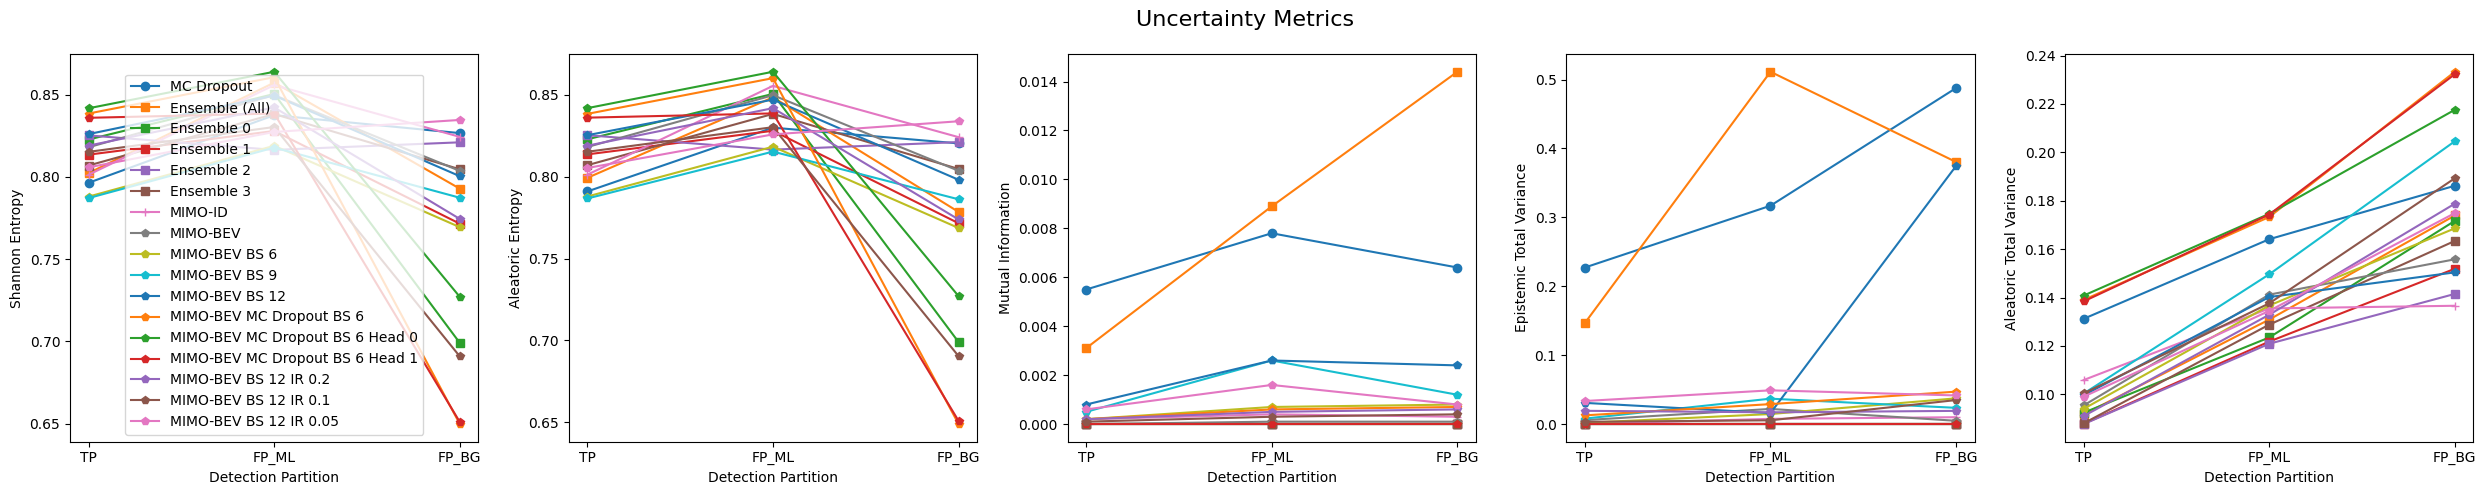

In [158]:
labels = ['TP', 'FP_ML', 'FP_BG']
x = np.arange(len(labels))  # the label locations

fig, axs = plt.subplots(1, 5, figsize=(25,5), dpi=100)
plt.rcParams.update({'font.size': 10})

metric_titles = ['Shannon Entropy', 'Aleatoric Entropy', 'Mutual Information', \
                 'Epistemic Total Variance', 'Aleatoric Total Variance']

curr_idx = 0
for i in range(len(metric_titles)):
    line1 = axs[i].plot(x, mcdropout[curr_idx:curr_idx+3], label='MC Dropout', marker='o')
    line2 = axs[i].plot(x, ensemble[curr_idx:curr_idx+3], label='Ensemble (All)', marker='s')
    line2 = axs[i].plot(x, ensemble_0[curr_idx:curr_idx+3], label='Ensemble 0', marker='s')
    line2 = axs[i].plot(x, ensemble_1[curr_idx:curr_idx+3], label='Ensemble 1', marker='s')
    line2 = axs[i].plot(x, ensemble_2[curr_idx:curr_idx+3], label='Ensemble 2', marker='s')
    line2 = axs[i].plot(x, ensemble_3[curr_idx:curr_idx+3], label='Ensemble 3', marker='s')
    line3 = axs[i].plot(x, mimo_id[curr_idx:curr_idx+3], label='MIMO-ID', marker='+')
    line4 = axs[i].plot(x, mimo_bev[curr_idx:curr_idx+3], label='MIMO-BEV', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs6[curr_idx:curr_idx+3], label='MIMO-BEV BS 6', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs9[curr_idx:curr_idx+3], label='MIMO-BEV BS 9', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs12[curr_idx:curr_idx+3], label='MIMO-BEV BS 12', marker='p')
    line4 = axs[i].plot(x, mimo_bev_mcdropout_bs6[curr_idx:curr_idx+3], label='MIMO-BEV MC Dropout BS 6', marker='p')
    line4 = axs[i].plot(x, mimo_bev_mcdropout_bs6_0[curr_idx:curr_idx+3], label='MIMO-BEV MC Dropout BS 6 Head 0', marker='p')
    line4 = axs[i].plot(x, mimo_bev_mcdropout_bs6_1[curr_idx:curr_idx+3], label='MIMO-BEV MC Dropout BS 6 Head 1', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs12_ir20[curr_idx:curr_idx+3], label='MIMO-BEV BS 12 IR 0.2', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs12_ir10[curr_idx:curr_idx+3], label='MIMO-BEV BS 12 IR 0.1', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs12_ir5[curr_idx:curr_idx+3], label='MIMO-BEV BS 12 IR 0.05', marker='p')
    
#     line4 = axs[i].plot(x, mimo_bev_wide[curr_idx:curr_idx+3], label='MIMO-BEV-WIDE', marker='p')
#     line4 = axs[i].plot(x, mimo_bev_3hds[curr_idx:curr_idx+3], label='MIMO-BEV-3HDS', marker='p')
#     line4 = axs[i].plot(x, mimo_bev_3hds_wide[curr_idx:curr_idx+3], label='MIMO-BEV-3HDS-WIDE', marker='p')
#     line4 = axs[i].plot(x, mimo_bev_diff_params[curr_idx:curr_idx+3], label='MIMO-BEV IR 0.6, BR 2', marker='p')
#     line4 = axs[i].plot(x, mimo_bev_diff_params2[curr_idx:curr_idx+3], label='MIMO-BEV BS 6', marker='p')
#     line4 = axs[i].plot(x, mimo_bev_diff_params3[curr_idx:curr_idx+3], label='MIMO-BEV BS 9', marker='p')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[i].set_ylabel(metric_titles[i])
    axs[i].set_xlabel('Detection Partition')
    axs[i].set_title('')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(labels)
    if curr_idx == 0:
        axs[i].legend()
    
    # Update curr_idx
    curr_idx += 3

fig.suptitle('Uncertainty Metrics', fontsize=16)
fig.tight_layout()
plt.show()

In [165]:
# Uncertainty metrics data
mcdropout = [1.84,1.92,1.92,1.84,1.92,1.92,0.0,0.0,0.0,0.04,0.65,0.65,0.06,0.31,0.3]
ensemble = [1.87,1.92,1.92,1.87,1.92,1.92,0.0,0.0,0.0,0.02,0.63,0.63,0.04,0.22,0.22]
mimo_id = [1.89,1.92,1.92,1.89,1.92,1.92,0.0,0.0,0.0,0.0,0.02,0.03,0.04,0.25,0.25]
mimo_bev = [1.89,1.92,1.92,1.89,1.92,1.92,0.0,0.0,0.0,0.0,0.04,0.04,0.04,0.24,0.24]
# mimo_bev_wide = [1.88,1.91,1.91,1.88,1.91,1.91,0.0,0.0,0.0,0.0,0.01,0.01,0.03,0.21,0.21]
# mimo_bev_3hds = [1.89,1.92,1.92,1.89,1.92,1.92,0.0,0.0,0.0,0.0,0.04,0.04,0.04,0.24,0.24]
# mimo_bev_3hds_wide = [1.89,1.92,1.92,1.89,1.92,1.92,0.0,0.0,0.0,0.0,0.04,0.03,0.03,0.21,0.21]
# mimo_bev_diff_params = [1.89,1.93,1.93,1.89,1.93,1.93,0.0,0.0,0.0,0.0,0.01,0.01,0.04,0.25,0.25]
# mimo_bev_diff_params2 = [1.88,1.92,1.92,1.88,1.92,1.92,0.0,0.0,0.0,0.0,0.04,0.04,0.04,0.24,0.24]
# mimo_bev_diff_params3 = [1.88,1.92,1.92,1.88,1.92,1.92,0.0,0.0,0.0,0.0,0.09,0.09,0.04,0.26,0.26]
# mimo_bev_diff_params4 = [1.88,1.93,1.93,1.88,1.93,1.93,0.0,0.0,0.0,0.01,0.06,0.06,0.04,0.25,0.25]

mcdropout = [0.504,0.4989,0.0051,0.0384,0.0602,0.9463,0.9413,0.0049,0.3369,0.182]
ensemble = [0.5803,0.5777,0.0026,0.0205,0.0418,0.919,0.9157,0.0033,0.2752,0.1281]
mimo_id = [0.6043,0.6043,0.0,0.0005,0.0414,0.9301,0.9299,0.0001,0.0022,0.1572]
mimo_bev = [0.6105,0.6105,0.0,0.0004,0.0416,0.9225,0.9225,0.0,0.0128,0.1483]

# Current
mcdropout = [0.5441,0.5389,0.0052,0.0384,0.0602,0.9463,0.9413,0.0049,0.3369,0.182]
ensemble = [0.614,0.6114,0.0026,0.0202,0.0417,0.9156,0.9114,0.0042,0.2753,0.1281]
# ensemble_0 = [0.5807,0.5807,0.0,0.0,0.0405,0.8638,0.8638,0.0,0.0,0.1342]
# ensemble_1 = [0.5772,0.5772,0.0,0.0,0.0408,0.8515,0.8515,0.0,0.0,0.1396]
# ensemble_2 = [0.5839,0.5839,0.0,0.0,0.0412,0.8691,0.8691,0.0,0.0,0.1403]
# ensemble_3 = [0.5668,0.5668,0.0,0.0,0.0423,0.8588,0.8588,0.0,0.0,0.1314]
mimo_id = [0.6455,0.6454,0.0,0.0005,0.0412,0.9301,0.9299,0.0001,0.0022,0.1572]
mimo_bev = [0.6522,0.6522,0.0,0.0004,0.0415,0.9225,0.9225,0.0,0.0128,0.1483]
# mimo_bev_bs6 = [0.5998,0.5996,0.0002,0.0004,0.0454,0.8621,0.8618,0.0004,0.0014,0.1463]
# mimo_bev_bs9 = [0.5894,0.5893,0.0001,0.0002,0.045,0.8576,0.857,0.0007,0.0123,0.152]
mimo_bev_bs12 = [0.6411,0.6405,0.0006,0.0012,0.0471,0.9354,0.9348,0.0007,0.0378,0.161]
mimo_bev_bs12_ir20 = [0.6466,0.6464,0.0002,0.0011,0.0425,0.9267,0.9266,0.0002,0.021,0.1404]
mimo_bev_bs12_ir10 = [0.6263,0.6262,0.0,0.0009,0.0431,0.9244,0.9244,0.0001,0.0133,0.1683]
mimo_bev_bs12_ir5 = [0.6327,0.6322,0.0005,0.0036,0.0438,0.917,0.9166,0.0004,0.0306,0.1445]

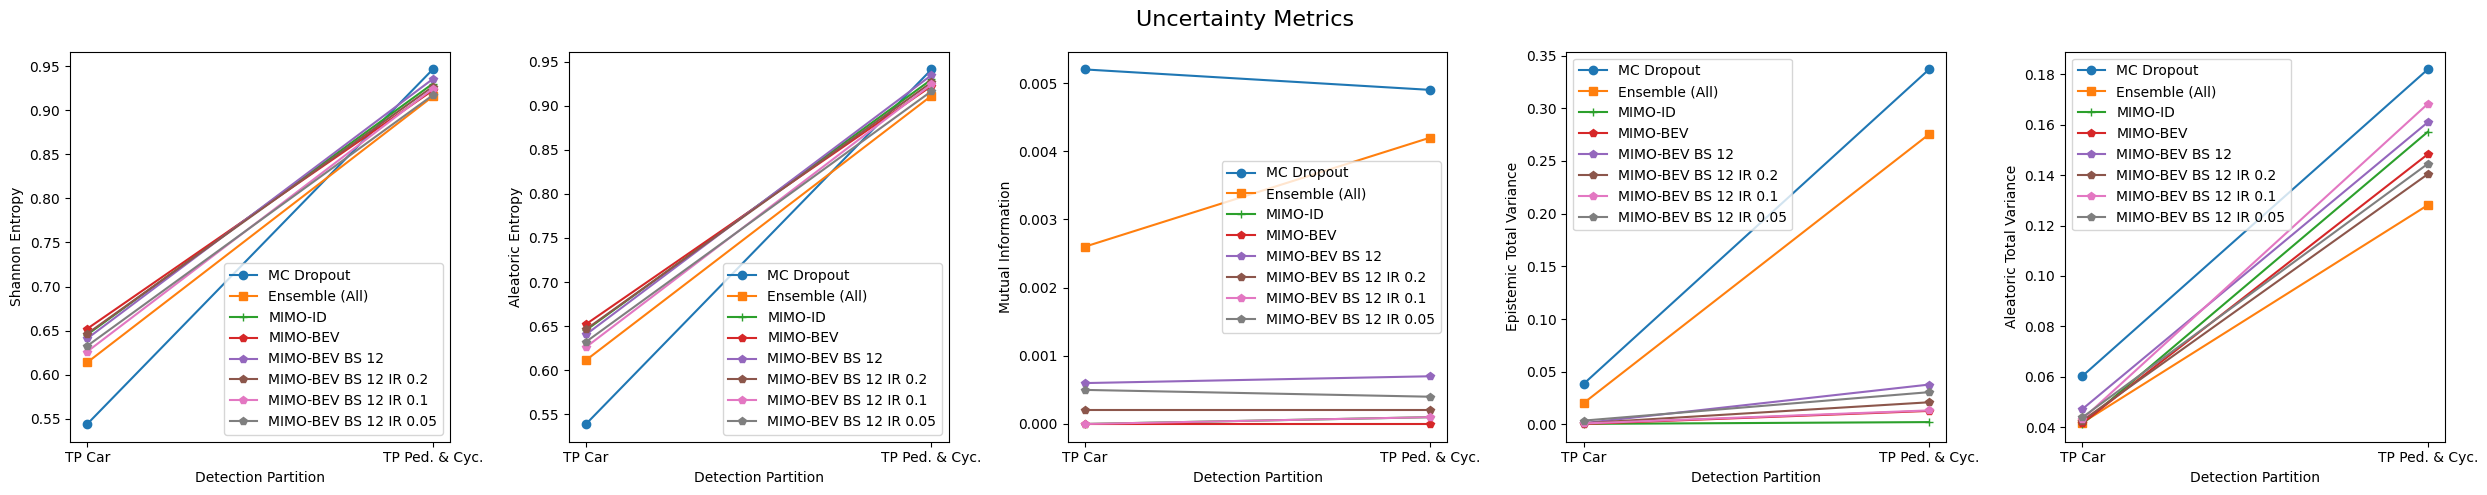

In [166]:
labels = ['TP Car', 'TP Ped. & Cyc.']#, 'FP Ignored (excluding Van)']
x = np.arange(len(labels))  # the label locations

fig, axs = plt.subplots(1, 5, figsize=(25,5), dpi=100)
plt.rcParams.update({'font.size': 10})

metric_titles = ['Shannon Entropy', 'Aleatoric Entropy', 'Mutual Information', \
                 'Epistemic Total Variance', 'Aleatoric Total Variance']

curr_idx = 0
for i in range(len(metric_titles)):
    line1 = axs[i].plot(x, [mcdropout[curr_idx],mcdropout[curr_idx+5]], label='MC Dropout', marker='o')
    line2 = axs[i].plot(x, [ensemble[curr_idx],ensemble[curr_idx+5]], label='Ensemble (All)', marker='s')
#     line2 = axs[i].plot(x, [ensemble_0[curr_idx],ensemble_0[curr_idx+5]], label='Ensemble 0', marker='s')
#     line2 = axs[i].plot(x, [ensemble_1[curr_idx],ensemble_1[curr_idx+5]], label='Ensemble 1', marker='s')
#     line2 = axs[i].plot(x, [ensemble_2[curr_idx],ensemble_2[curr_idx+5]], label='Ensemble 2', marker='s')
#     line2 = axs[i].plot(x, [ensemble_3[curr_idx],ensemble_3[curr_idx+5]], label='Ensemble 3', marker='s')
    line3 = axs[i].plot(x, [mimo_id[curr_idx],mimo_id[curr_idx+5]], label='MIMO-ID', marker='+')
    line4 = axs[i].plot(x, [mimo_bev[curr_idx],mimo_bev[curr_idx+5]], label='MIMO-BEV', marker='p')
#     line4 = axs[i].plot(x, [mimo_bev_bs6[curr_idx],mimo_bev_bs6[curr_idx+5]], label='MIMO-BEV BS 6', marker='p')
#     line4 = axs[i].plot(x, [mimo_bev_bs9[curr_idx],mimo_bev_bs9[curr_idx+5]], label='MIMO-BEV BS 9', marker='p')
    line4 = axs[i].plot(x, [mimo_bev_bs12[curr_idx],mimo_bev_bs12[curr_idx+5]], label='MIMO-BEV BS 12', marker='p')
    line4 = axs[i].plot(x, [mimo_bev_bs12_ir20[curr_idx],mimo_bev_bs12_ir20[curr_idx+5]], label='MIMO-BEV BS 12 IR 0.2', marker='p')
    line4 = axs[i].plot(x, [mimo_bev_bs12_ir10[curr_idx],mimo_bev_bs12_ir10[curr_idx+5]], label='MIMO-BEV BS 12 IR 0.1', marker='p')
    line4 = axs[i].plot(x, [mimo_bev_bs12_ir5[curr_idx],mimo_bev_bs12_ir5[curr_idx+5]], label='MIMO-BEV BS 12 IR 0.05', marker='p')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[i].set_ylabel(metric_titles[i])
    axs[i].set_xlabel('Detection Partition')
    axs[i].set_title('')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(labels)
    axs[i].legend()
    
    # Update curr_idx
    curr_idx += 1

fig.suptitle('Uncertainty Metrics', fontsize=16)
fig.tight_layout()
plt.show()

In [170]:
# Hypothesis
# Aleatoric Uncertainty increases with distance
# Epistemic Uncertainty increases with occlusion

# Uncertainty
# Dist <= 10, 10 < Dist <= 20, 20 < Dist <= 30
# occ 0, occ 1, occ 2

# MC Dropout
mcdropout = {
    'SE': [0.4874,0.5004,0.5459,0.4874,0.4775,-1],
    'AE': [0.4818,0.4953,0.5407,0.4818,0.4723,-1],
    'MI': [0.0056,0.0051,0.0053,0.0056,0.0052,-1],
    'ETV': [0.0221,0.0341,0.0366,0.0221,0.0526,-1],
    'ATV': [0.0551,0.0521,0.0619,0.0551,0.0542,-1]
}

# Ensemble
ensemble = {
    'SE': [0.5517,0.5727,0.6085,0.5517,0.581,-1],
    'AE': [0.5483,0.5708,0.6061,0.5483,0.5786,-1],
    'MI': [0.0034,0.0019,0.0024,0.0034,0.0024,-1],
    'ETV': [0.005,0.0058,0.0142,0.005,0.0044,-1],
    'ATV': [0.035,0.0352,0.0418,0.035,0.034,-1]
}

# ensemble_0 = {
#     'SE': [0.5134,0.5435,0.5773,0.5134,0.5536,-1],
#     'AE': [0.5134,0.5435,0.5773,0.5134,0.5536,-1],
#     'MI': [0.0,0.0,0.0,0.0,0.0,-1],
#     'ETV': [0.0,0.0,0.0,0.0,0.0,-1],
#     'ATV': [0.033,0.0334,0.0402,0.033,0.0331,-1]
# }

# ensemble_1 = {
#     'SE': [0.5079,0.5456,0.5444,0.5079,0.5081,-1],
#     'AE': [0.5079,0.5456,0.5444,0.5079,0.5081,-1],
#     'MI': [0.0,0.0,0.0,0.0,0.0,-1],
#     'ETV': [0.0,0.0,0.0,0.0,0.0,-1],
#     'ATV': [0.0337,0.0357,0.042,0.0337,0.0332,-1]
# }

# ensemble_2 = {
#     'SE': [0.5215,0.5533,0.5819,0.5215,0.5234,-1],
#     'AE': [0.5215,0.5533,0.5819,0.5215,0.5234,-1],
#     'MI': [0.0,0.0,0.0,0.0,0.0,-1],
#     'ETV': [0.0,0.0,0.0,0.0,0.0,-1],
#     'ATV': [0.0356,0.0347,0.0414,0.0356,0.034,-1]
# }

# ensemble_3 = {
#     'SE': [0.5009,0.5306,0.5572,0.5009,0.4832,-1],
#     'AE': [0.5009,0.5306,0.5572,0.5009,0.4832,-1],
#     'MI': [0.0,0.0,0.0,0.0,0.0,-1],
#     'ETV': [0.0,0.0,0.0,0.0,0.0,-1],
#     'ATV': [0.035,0.0354,0.042,0.035,0.0343,-1]
# }

# MIMO A
mimo_id = {
    'SE': [0.554,0.5626,0.6117,0.554,0.5457,-1],
    'AE': [0.554,0.5626,0.6116,0.554,0.5457,-1],
    'MI': [0.0,0.0,0.0,0.0,0.0,-1],
    'ETV': [0.0,0.0,1e-04,0.0,0.0,-1],
    'ATV': [0.0348,0.0349,0.0409,0.0348,0.0334,-1]
}

# MIMO C
mimo_bev = {
    'SE': [0.5732,0.6004,0.656,0.5732,0.5571,-1],
    'AE': [0.5732,0.6004,0.656,0.5732,0.5571,-1],
    'MI': [0.0,0.0,0.0,0.0,0.0,-1],
    'ETV': [1e-04,0.0,0.0,1e-04,0.0,-1],
    'ATV': [0.0377,0.0339,0.0415,0.0377,0.0348,-1]
}

# mimo_bev_bs6 = {
#     'SE': [0.5263,0.5715,0.5876,0.5263,0.5345,-1],
#     'AE': [0.5261,0.5714,0.5875,0.5261,0.5345,-1],
#     'MI': [0.0002,0.0002,0.0002,0.0002,0.0001,-1],
#     'ETV': [1e-04,0.0002,1e-04,1e-04,1e-04,-1],
#     'ATV': [0.0383,0.0372,0.0456,0.0383,0.039,-1]
# }

# mimo_bev_bs9 = {
#     'SE': [0.5548,0.5533,0.5443,0.5548,0.5267,-1],
#     'AE': [0.5546,0.5532,0.5442,0.5546,0.5266,-1],
#     'MI': [0.0001,0.0001,0.0001,0.0001,0.0001,-1],
#     'ETV': [0.0002,0.0002,0.0002,0.0002,0.0003,-1],
#     'ATV': [0.0368,0.0367,0.0463,0.0368,0.039,-1]
# }

mimo_bev_bs12 = {
    'SE': [0.5994,0.6027,0.6336,0.5994,0.62,-1],
    'AE': [0.5989,0.6022,0.6331,0.5989,0.6196,-1],
    'MI': [0.0005,0.0005,0.0005,0.0005,0.0004,-1],
    'ETV': [1e-04,0.0002,0.0002,1e-04,0.0002,-1],
    'ATV': [0.0416,0.0404,0.0468,0.0416,0.0394,-1]
}

mimo_bev_bs12_ir20 = {
    'SE': [0.5751,0.6063,0.6351,0.5751,0.5801,-1],
    'AE': [0.5744,0.6062,0.6349,0.5744,0.58,-1],
    'MI': [0.0007,0.0001,0.0001,0.0007,0.0001,-1],
    'ETV': [0.0003,0.0003,0.0002,0.0003,0.0002,-1],
    'ATV': [0.0387,0.0343,0.0416,0.0387,0.0395,-1]
}

mimo_bev_bs12_ir10 = {
    'SE': [0.5993,0.5893,0.6198,0.5993,0.5474,-1],
    'AE': [0.5993,0.5893,0.6198,0.5993,0.5474,-1],
    'MI': [0.0,0.0,0.0,0.0,0.0,-1],
    'ETV': [1e-04,1e-04,1e-04,1e-04,0.0,-1],
    'ATV': [0.0371,0.0353,0.0445,0.0371,0.0354,-1]
}

mimo_bev_bs12_ir5 = {
    'SE': [0.5976,0.5888,0.6308,0.5976,0.5735,-1],
    'AE': [0.5972,0.5884,0.6303,0.5972,0.5731,-1],
    'MI': [0.0005,0.0004,0.0005,0.0005,0.0004,-1],
    'ETV': [0.0002,0.0002,0.002,0.0002,0.0002,-1],
    'ATV': [0.0379,0.0363,0.0446,0.0379,0.0385,-1]
}


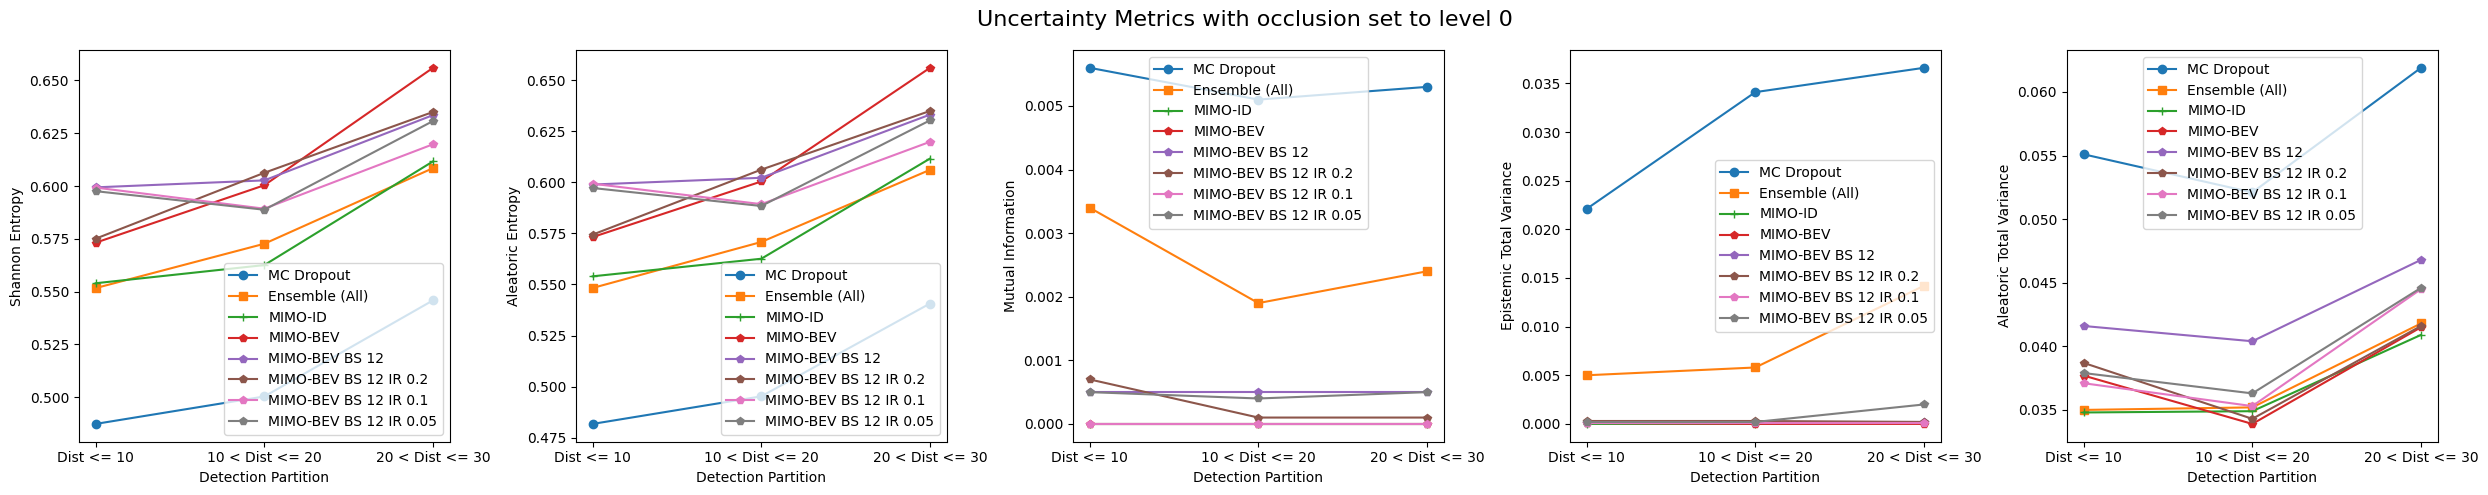

In [171]:
labels = ['Dist <= 10', '10 < Dist <= 20', '20 < Dist <= 30']
x = np.arange(len(labels))  # the label locations

fig, axs = plt.subplots(1, 5, figsize=(25,5), dpi=100)
plt.rcParams.update({'font.size': 10})

metric_titles = ['Shannon Entropy', 'Aleatoric Entropy', 'Mutual Information', \
                 'Epistemic Total Variance', 'Aleatoric Total Variance']

um_types = ['SE','AE','MI','ETV','ATV']

curr_idx = 0
for i in range(len(um_types)):
    line1 = axs[i].plot(x, mcdropout[um_types[i]][:3], label='MC Dropout', marker='o')
    line2 = axs[i].plot(x, ensemble[um_types[i]][:3], label='Ensemble (All)', marker='s')
#     line2 = axs[i].plot(x, ensemble_0[um_types[i]][:3], label='Ensemble 0', marker='s')
#     line2 = axs[i].plot(x, ensemble_1[um_types[i]][:3], label='Ensemble 1', marker='s')
#     line2 = axs[i].plot(x, ensemble_2[um_types[i]][:3], label='Ensemble 2', marker='s')
#     line2 = axs[i].plot(x, ensemble_3[um_types[i]][:3], label='Ensemble 3', marker='s')
    line3 = axs[i].plot(x, mimo_id[um_types[i]][:3], label='MIMO-ID', marker='+')
    line4 = axs[i].plot(x, mimo_bev[um_types[i]][:3], label='MIMO-BEV', marker='p')
#     line4 = axs[i].plot(x, mimo_bev_bs6[um_types[i]][:3], label='MIMO-BEV BS 6', marker='p')
#     line4 = axs[i].plot(x, mimo_bev_bs9[um_types[i]][:3], label='MIMO-BEV BS 9', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs12[um_types[i]][:3], label='MIMO-BEV BS 12', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs12_ir20[um_types[i]][:3], label='MIMO-BEV BS 12 IR 0.2', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs12_ir10[um_types[i]][:3], label='MIMO-BEV BS 12 IR 0.1', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs12_ir5[um_types[i]][:3], label='MIMO-BEV BS 12 IR 0.05', marker='p')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[i].set_ylabel(metric_titles[i])
    axs[i].set_xlabel('Detection Partition')
    axs[i].set_title('')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(labels)
    axs[i].legend()
    
    # Update curr_idx
    curr_idx += 3

fig.suptitle('Uncertainty Metrics with occlusion set to level 0', fontsize=16)
fig.tight_layout()
plt.show()

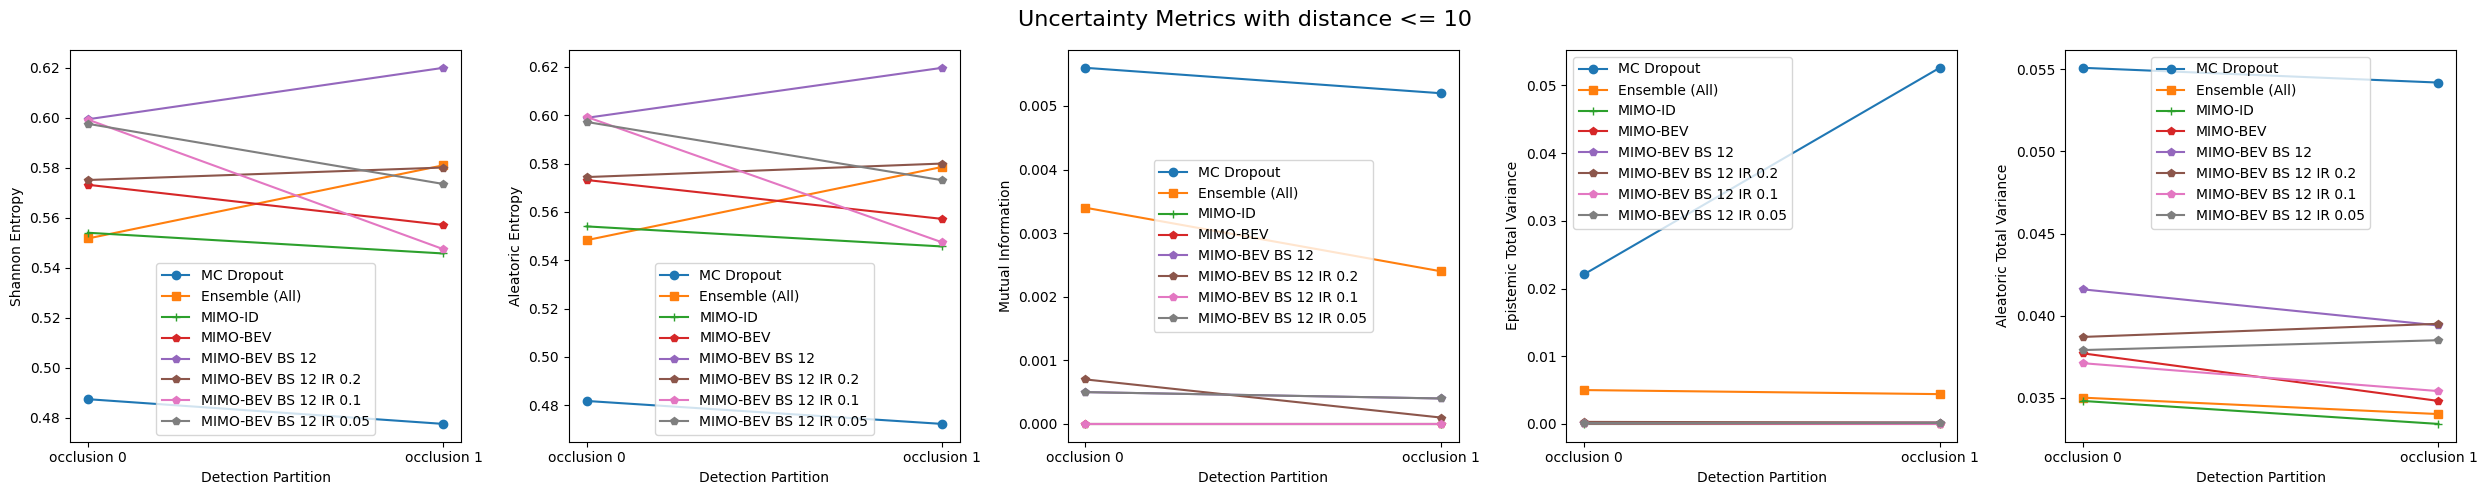

In [172]:
labels = ['occlusion 0', 'occlusion 1']
x = np.arange(len(labels))  # the label locations

fig, axs = plt.subplots(1, 5, figsize=(25,5), dpi=100)
plt.rcParams.update({'font.size': 10})

metric_titles = ['Shannon Entropy', 'Aleatoric Entropy', 'Mutual Information', \
                 'Epistemic Total Variance', 'Aleatoric Total Variance']

um_types = ['SE','AE','MI','ETV','ATV']

curr_idx = 0
for i in range(len(um_types)):
    line1 = axs[i].plot(x, mcdropout[um_types[i]][3:5], label='MC Dropout', marker='o')
    line2 = axs[i].plot(x, ensemble[um_types[i]][3:5], label='Ensemble (All)', marker='s')
#     line2 = axs[i].plot(x, ensemble_0[um_types[i]][3:5], label='Ensemble 0', marker='s')
#     line2 = axs[i].plot(x, ensemble_1[um_types[i]][3:5], label='Ensemble 1', marker='s')
#     line2 = axs[i].plot(x, ensemble_2[um_types[i]][3:5], label='Ensemble 2', marker='s')
#     line2 = axs[i].plot(x, ensemble_3[um_types[i]][3:5], label='Ensemble 3', marker='s')
    line3 = axs[i].plot(x, mimo_id[um_types[i]][3:5], label='MIMO-ID', marker='+')
    line4 = axs[i].plot(x, mimo_bev[um_types[i]][3:5], label='MIMO-BEV', marker='p')
#     line4 = axs[i].plot(x, mimo_bev_bs6[um_types[i]][3:5], label='MIMO-BEV BS 6', marker='p')
#     line4 = axs[i].plot(x, mimo_bev_bs9[um_types[i]][3:5], label='MIMO-BEV BS 9', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs12[um_types[i]][3:5], label='MIMO-BEV BS 12', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs12_ir20[um_types[i]][3:5], label='MIMO-BEV BS 12 IR 0.2', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs12_ir10[um_types[i]][3:5], label='MIMO-BEV BS 12 IR 0.1', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs12_ir5[um_types[i]][3:5], label='MIMO-BEV BS 12 IR 0.05', marker='p')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[i].set_ylabel(metric_titles[i])
    axs[i].set_xlabel('Detection Partition')
    axs[i].set_title('')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(labels)
    axs[i].legend()
    
    # Update curr_idx
    curr_idx += 3

fig.suptitle('Uncertainty Metrics with distance <= 10', fontsize=16)
fig.tight_layout()
plt.show()

In [122]:
nan = 0

mcdropout_um = [[nan, 0.8642692308950964, 0.8486403074979387, 0.696961235090932, 0.7179139855507869, 0.5295800370436043, 0.47564287886030876, 0.3489986868926081, 0.2108974822262608, 0.1477984516836775], [nan, 0.8596624391155911, 0.84217198625441, 0.6913329288433739, 0.709938394819425, 0.5216143747359111, 0.46867671734675603, 0.34318621477716243, 0.20627074954398533, 0.14362609214189848], [nan, 0.004606791779505293, 0.006468321243528696, 0.0056283062475579945, 0.007975590731361878, 0.007965662307693343, 0.006966161513552755, 0.005812472115445709, 0.004626732682275465, 0.004172359541779042], [nan, 0.012187452, 0.028661896, 0.013376905, 0.3143518, 0.135127, 0.06529321, 0.06951615, 0.04274715, 0.028775107], [nan, 0.15032937, 0.18503073, 0.14767893, 0.1484269, 0.1228418, 0.1044069, 0.08485113, 0.06474332, 0.054949056]]
# [0, 1, 2, 8, 27, 96, 392, 1066, 1791, 229]

mcdropout_old_um = [[nan, nan, 0.7442351436039552, 0.691867899017678, 0.7472243175500163, 0.5904835534168466, 0.4857451947540801, 0.36969863780001494, 0.2521409267865388, 0.19678304676692682], [nan, nan, 0.7388922123341787, 0.6869327247290812, 0.7405920539981086, 0.5834989100800864, 0.4796088989256984, 0.3647120276875001, 0.24806889393503154, 0.19294376127227592], [nan, nan, 0.005342931269776474, 0.00493517428859686, 0.006632263551907652, 0.006984643336760188, 0.006136295828381728, 0.004986610112514888, 0.004072032851507244, 0.003839285494650903], [nan, nan, 0.029166102, 0.38385665, 0.32004502, 0.07801227, 0.046462867, 0.06577102, 0.030626768, 0.021145215], [nan, nan, 0.21136734, 0.18563539, 0.20566726, 0.13974053, 0.11550256, 0.09086951, 0.0695967, 0.05874297]]
# [0, 0, 1, 12, 35, 120, 450, 1079, 1758, 257]

ensemble_um = [[nan, nan, nan, 0.6288056252165568, 0.6571502277909433, 0.5265820744319969, 0.4216926361672192, 0.3153721576579011, 0.19871937081067675, 0.13489306776473572], [nan, nan, nan, 0.6150584607427302, 0.6345473072197885, 0.5106516959163104, 0.40935285156380546, 0.3072036831391914, 0.19450591919066426, 0.1328452972004725], [nan, nan, nan, 0.013747164473826613, 0.022602920571154803, 0.015930378515686457, 0.012339784603413706, 0.00816847451870977, 0.0042134516200124554, 0.002047770564263244], [nan, nan, nan, 0.39135805, 0.020185832, 0.14260717, 0.13058908, 0.06583436, 0.028662175, 0.009251544], [nan, nan, nan, 0.12945709, 0.14131925, 0.10972178, 0.08805273, 0.068205304, 0.047234517, 0.03774806]]
# [0, 0, 0, 5, 15, 68, 324, 917, 1839, 475]

mimo_id_um = [[nan, nan, nan, 0.7748733082434368, 0.7374409718479975, 0.596666928566462, 0.48508087446125675, 0.368242076835719, 0.2201697437433294, 0.14982326358326384], [nan, nan, nan, 0.7747528988900014, 0.7373451173175388, 0.5963713090722679, 0.48487236615854595, 0.3681213462777302, 0.22011920264238197, 0.14979774804297163], [nan, nan, nan, 0.00012040935343534305, 9.58545304583891e-05, 0.0002956194941940156, 0.00020850830271075814, 0.00012073055798879755, 5.054110094745331e-05, 2.5515540292180155e-05], [nan, nan, nan, 0.00024370746, 9.793343e-05, 0.0004934448, 0.00028244124, 0.0025937697, 6.930834e-05, 4.8356073e-05], [nan, nan, nan, 0.1331147, 0.14152013, 0.10353979, 0.0891157, 0.06868319, 0.045359276, 0.03646788]]
# [0, 0, 0, 9, 30, 63, 347, 999, 1797, 383]

mimo_id_old_um = [[nan, nan, 0.6779637788771077, 0.5985304177144717, 0.5867846352179434, 0.41187108056055327, 0.25595617395841813, 0.18513034682500382, 0.09803026126328121, 0.06657255327207617], [nan, nan, 0.6779163904908511, 0.598397426266647, 0.5865942676868482, 0.41177733280160417, 0.25581700641639493, 0.18507878793153518, 0.09801184231481101, 0.06655713393989324], [nan, nan, 4.738838625650832e-05, 0.00013299144782456175, 0.00019036753109509234, 9.374775894905972e-05, 0.0001391675420231824, 5.155889346863849e-05, 1.8418948470191186e-05, 1.541933218295204e-05], [nan, nan, 8.021214e-06, 6.2179915e-06, 0.07511989, 0.00017754067, 0.00013693418, 0.0024736696, 7.544171e-05, 5.4301345e-05], [nan, nan, 0.13465585, 0.17033635, 0.16332361, 0.14207864, 0.10550928, 0.08080298, 0.053377282, 0.043006614]]
# [0, 0, 3, 11, 33, 101, 391, 1044, 1828, 372]

mimo_bev_um = [[nan, nan, 0.822632145129885, 0.7712549652519342, 0.7699187833089632, 0.6589913964891679, 0.5331066532148065, 0.38936883866772093, 0.2425496208538942, 0.17335898676943398], [nan, nan, 0.822547013717708, 0.7712261939876335, 0.7698205303371196, 0.6589428944115293, 0.5330733639929243, 0.389349526894375, 0.2425418814562302, 0.17335392212118877], [nan, nan, 8.51314121770308e-05, 2.8771264300601434e-05, 9.82529718435543e-05, 4.850207763844134e-05, 3.328922188230894e-05, 1.9311773346022164e-05, 7.739397663978794e-06, 5.064648245208649e-06], [nan, nan, 1.5829471e-06, 4.0888767e-06, 0.0003925609, 9.411498e-05, 0.0076138354, 6.768862e-05, 3.1007683e-05, 2.0810794e-05], [nan, nan, 0.066915974, 0.116225146, 0.14534335, 0.11593195, 0.09600216, 0.06965924, 0.04763348, 0.037514847]]
# [0, 0, 1, 3, 30, 76, 332, 990, 1853, 366]

mimo_bev_old_um = [[nan, nan, 0.8579618531660282, 0.7402895729079984, 0.6841839383034548, 0.429101915852134, 0.3641056536701882, 0.23805737959122364, 0.13252147358831556, 0.08387898922469253], [nan, nan, 0.8578502794212811, 0.7399995917319311, 0.6838063497073843, 0.42897022153926834, 0.3640005267125282, 0.23795386127162224, 0.13247213120277937, 0.08383892184959249], [nan, nan, 0.00011157374474718429, 0.00028998117606728247, 0.000377588596070292, 0.00013169431286570992, 0.00010512695765992751, 0.00010351831960136009, 4.9342385536207413e-05, 4.006737510004202e-05], [nan, nan, 3.000368e-05, 1.8091207e-05, 0.00040395293, 0.00017737277, 0.00024465434, 0.00017626405, 0.00010640922, 0.000109168155], [nan, nan, 0.1379371, 0.17936616, 0.20677167, 0.13186169, 0.110832214, 0.08047484, 0.053426985, 0.041591592]]
# [0, 0, 2, 7, 47, 92, 398, 1017, 1840, 358]

mimo_bev_bs6_um = [[nan, nan, nan, 0.1560002708713808, 0.3125721693228604, 0.18513416736739546, 0.12384582654710036, 0.07201254098872939, 0.029030859685821222, 0.017805113135423375], [nan, nan, nan, 0.15561426790404936, 0.31121631563458624, 0.1836234176351937, 0.12338488915170483, 0.0718205431142657, 0.028968189898394392, 0.017775651251338346], [nan, nan, nan, 0.0003860029673314405, 0.0013558536882741468, 0.0015107497322017825, 0.0004609373953955558, 0.00019199787446370263, 6.266978742683124e-05, 2.946188408503323e-05], [nan, nan, nan, 0.0007701336, 0.0003004447, 0.00042795364, 0.007604463, 0.00022120036, 0.0001661724, 0.00014356928], [nan, nan, nan, 0.10528675, 0.15645252, 0.1248554, 0.10084732, 0.07461601, 0.049871963, 0.040278547]]
# [0, 0, 0, 2, 22, 83, 342, 999, 1824, 380]


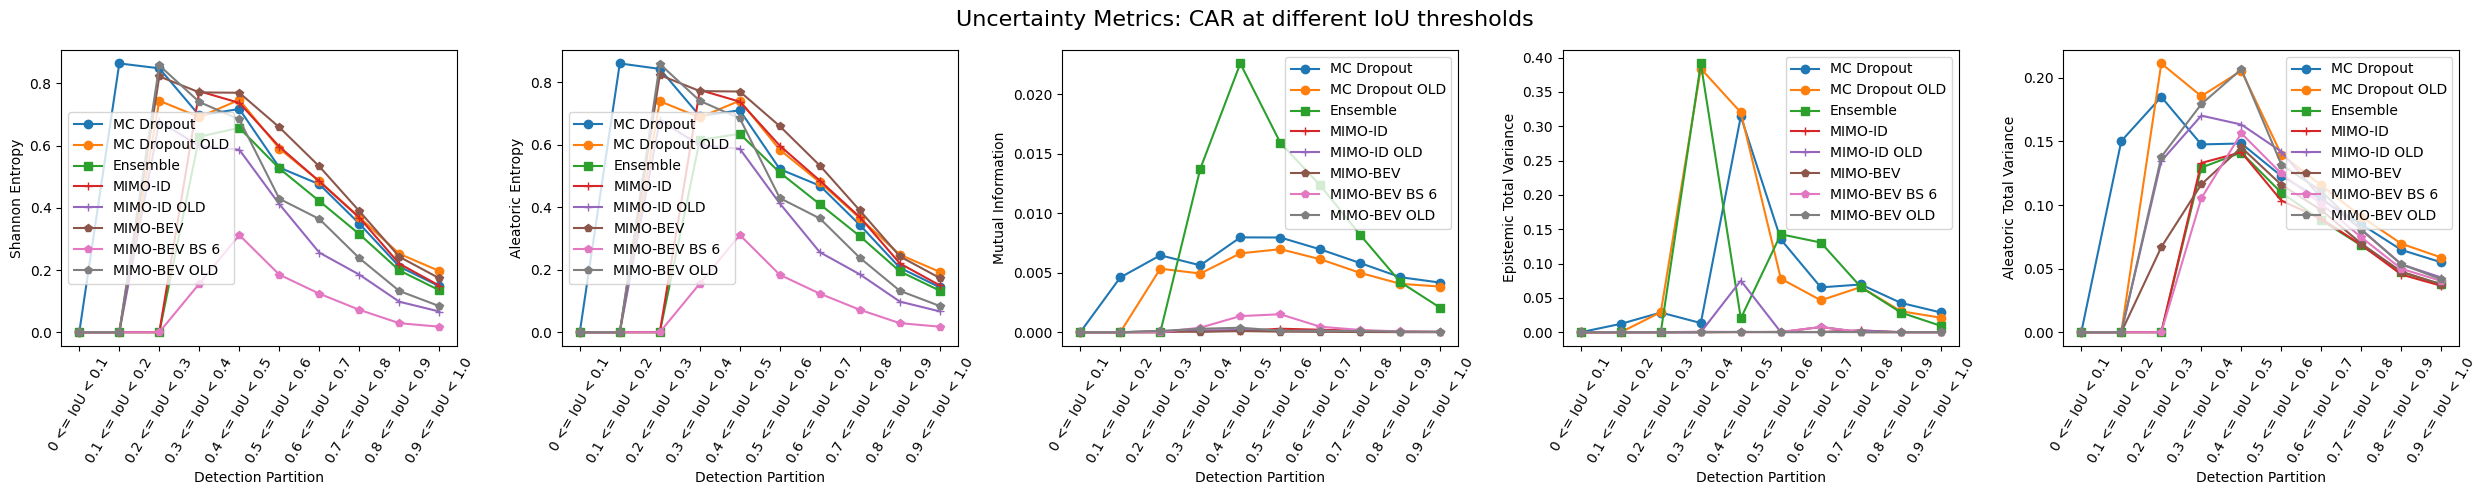

In [124]:
labels = ['0 <= IoU < 0.1', '0.1 <= IoU < 0.2', '0.2 <= IoU < 0.3', '0.3 <= IoU < 0.4', '0.4 <= IoU < 0.5', \
         '0.5 <= IoU < 0.6', '0.6 <= IoU < 0.7', '0.7 <= IoU < 0.8', '0.8 <= IoU < 0.9', '0.9 <= IoU < 1.0']
x = np.arange(len(labels))  # the label locations

fig, axs = plt.subplots(1, 5, figsize=(25,5), dpi=100)
plt.rcParams.update({'font.size': 10})

metric_titles = ['Shannon Entropy', 'Aleatoric Entropy', 'Mutual Information', \
                 'Epistemic Total Variance', 'Aleatoric Total Variance']

um_types = ['SE','AE','MI','ETV','ATV']

curr_idx = 0
for i in range(len(um_types)):
    line1 = axs[i].plot(x, mcdropout_um[i], label='MC Dropout', marker='o')
    line1 = axs[i].plot(x, mcdropout_old_um[i], label='MC Dropout OLD', marker='o')
    line2 = axs[i].plot(x, ensemble_um[i], label='Ensemble', marker='s')
    line3 = axs[i].plot(x, mimo_id_um[i], label='MIMO-ID', marker='+')
    line3 = axs[i].plot(x, mimo_id_old_um[i], label='MIMO-ID OLD', marker='+')
    line4 = axs[i].plot(x, mimo_bev_um[i], label='MIMO-BEV', marker='p')
    line4 = axs[i].plot(x, mimo_bev_bs6_um[i], label='MIMO-BEV BS 6', marker='p')
    line4 = axs[i].plot(x, mimo_bev_old_um[i], label='MIMO-BEV OLD', marker='p')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[i].set_ylabel(metric_titles[i])
    axs[i].set_xlabel('Detection Partition')
    axs[i].set_title('')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(labels, rotation=60)
    axs[i].legend()
    
    # Update curr_idx
    curr_idx += 3

fig.suptitle('Uncertainty Metrics: CAR at different IoU thresholds', fontsize=16)
fig.tight_layout()
plt.show()